## 1. 线性回归
### 1.1 线性回归模型从零开始

In [1]:
# import packages and modules
#matplotlib设置为嵌入显示
%matplotlib inline
import torch
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random

print(torch.__version__)

1.4.0


In [2]:
# 生成数据集
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = torch.randn(num_examples, num_inputs, dtype=torch.float32)
labels = true_w[0]*features[:, 0] + true_w[1]*features[:, 1] + true_b
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=torch.float32)

In [3]:
features.shape, labels.shape

(torch.Size([1000, 2]), torch.Size([1000]))

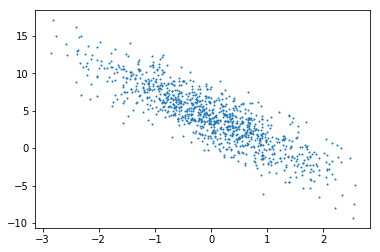

In [4]:
plt.scatter(features[:, 1].numpy(), labels.numpy(),1)

In [5]:
#读取数据集
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)#用于将一个列表中的元素打乱
    for i in range(0, num_examples, batch_size):
        j = torch.LongTensor(indices[i:min(i+batch_size, num_examples)])
        #将选中的数据以迭代器对象的形式返回
        yield features.index_select(0, j), labels.index_select(0, j)

In [6]:
# 设置每次读取小批量的大小
batch_size = 10
#测试函数是否成功读取到数据
for X, y in data_iter(batch_size, features, labels):
    print(X, y)
    break

tensor([[-0.8259, -0.6399],
        [-0.5054, -0.3928],
        [-1.7785, -2.4112],
        [ 1.3107, -1.2997],
        [ 1.4620, -0.9697],
        [ 0.0502,  0.8739],
        [ 1.7768,  0.5330],
        [-2.5367, -0.6981],
        [ 0.3319,  1.7700],
        [-0.4527, -0.0365]]) tensor([ 4.7222,  4.5268,  8.8426, 11.2481, 10.4257,  1.3435,  5.9312,  1.5029,
        -1.1461,  3.4233])


In [7]:
# 初始化模型参数
w = torch.tensor(np.random.normal(0, 0.01, (num_inputs, 1)), dtype=torch.float32, requires_grad=True)
b = torch.zeros(1, dtype=torch.float32, requires_grad=True)
w,b

(tensor([[0.0060],
         [0.0057]], requires_grad=True), tensor([0.], requires_grad=True))

In [8]:
#定义模型
def linereg(X, w, b):
    return torch.mm(X, w)+b #torch.mm(a, b)是矩阵a和b矩阵相乘

#损失函数
def squared_loss(y_hat, y):
    #y.view(shape)将y以shape的形式展示,但不实质改变y的形状
    return (y_hat - y.view(y_hat.size())) ** 2 / 2

#优化函数
#实现了小批量随机梯度下降算法
def sgd(params, lr, batch_size): 
    for param in params:
        param.data -= lr * param.grad / batch_size

训练模型

In [9]:
lr = 0.03
num_epochs = 3
net = linereg
loss = squared_loss

for epoch in range(num_epochs):  # 训练模型一共需要num_epochs个迭代周期
    # 在每一个迭代周期中，会使用训练数据集中所有样本一次（假设样本数能够被批量大小整除）。X
    # 和y分别是小批量样本的特征和标签
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y).sum()  # l是有关小批量X和y的损失
        l.backward()  # 小批量的损失对模型参数求梯度
        sgd([w, b], lr, batch_size)  # 使用小批量随机梯度下降迭代模型参数

        # 不要忘了梯度清零
        w.grad.data.zero_()
        b.grad.data.zero_()
    train_l = loss(net(features, w, b), labels)
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().item()))

epoch 1, loss 0.035947
epoch 2, loss 0.000125
epoch 3, loss 0.000050


In [10]:
w,b

(tensor([[ 1.9999],
         [-3.4003]], requires_grad=True), tensor([4.1998], requires_grad=True))

## 1.2 使用pytorch简洁实现线性回归

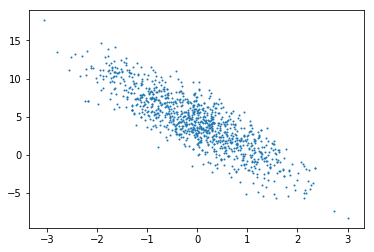

In [11]:
#导包
%matplotlib inline
import torch
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random

# 生成数据集
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = torch.randn(num_examples, num_inputs,
                       dtype=torch.float32)
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()),
                       dtype=torch.float32)

plt.scatter(features[:, 1].numpy(), labels.numpy(), 1);

In [12]:
#读取数据
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)  # 样本的读取顺序是随机的
    for i in range(0, num_examples, batch_size):
        j = torch.LongTensor(indices[i: min(i + batch_size, num_examples)]) # 最后一次可能不足一个batch
        yield  features.index_select(0, j), labels.index_select(0, j)


batch_size = 10
#测试是否正确读取
for X, y in data_iter(batch_size, features, labels):
    print(X, y)
    break

tensor([[-1.4094,  1.1157],
        [ 0.4838,  1.0808],
        [-0.2142,  0.6703],
        [ 0.0347,  1.0379],
        [-1.3743,  1.1857],
        [-0.3141,  0.1723],
        [ 1.9648,  0.7172],
        [-0.2604,  0.1299],
        [ 0.8240,  0.1903],
        [-2.7388,  0.2908]]) tensor([-2.4243,  1.5010,  1.5004,  0.7439, -2.5806,  2.9671,  5.6808,  3.2534,
         5.2127, -2.2597])


In [13]:
#初始化模型参数
w = torch.tensor(np.random.normal(0, 0.01, (num_inputs, 1)), dtype=torch.float32, requires_grad=True)
b = torch.zeros(1, dtype=torch.float32, requires_grad=True)

#定义模型
def linreg(X, w, b):
    return torch.mm(X, w) + b

#定义损失函数
def squared_loss(y_hat, y):
    # 注意这里返回的是向量
    return (y_hat - y.view(y_hat.size())) ** 2 / 2

#定义优化算法
def sgd(params, lr, batch_size):
    for param in params:
        param.data -= lr * param.grad / batch_size # 注意这里更改param时用的param.data
        

#训练模型
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y).sum()  # l是有关小批量X和y的损失
        l.backward()  # 小批量的损失对模型参数求梯度
        sgd([w, b], lr, batch_size)  # 使用小批量随机梯度下降迭代模型参数

        #梯度清零
        w.grad.data.zero_()
        b.grad.data.zero_()
    train_l = loss(net(features, w, b), labels)
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().item()))

epoch 1, loss 0.040722
epoch 2, loss 0.000152
epoch 3, loss 0.000044


In [14]:
w,b

(tensor([[ 1.9999],
         [-3.4000]], requires_grad=True), tensor([4.1997], requires_grad=True))

## 1.3 课后作业

    难受,全错 0.0
继续加油

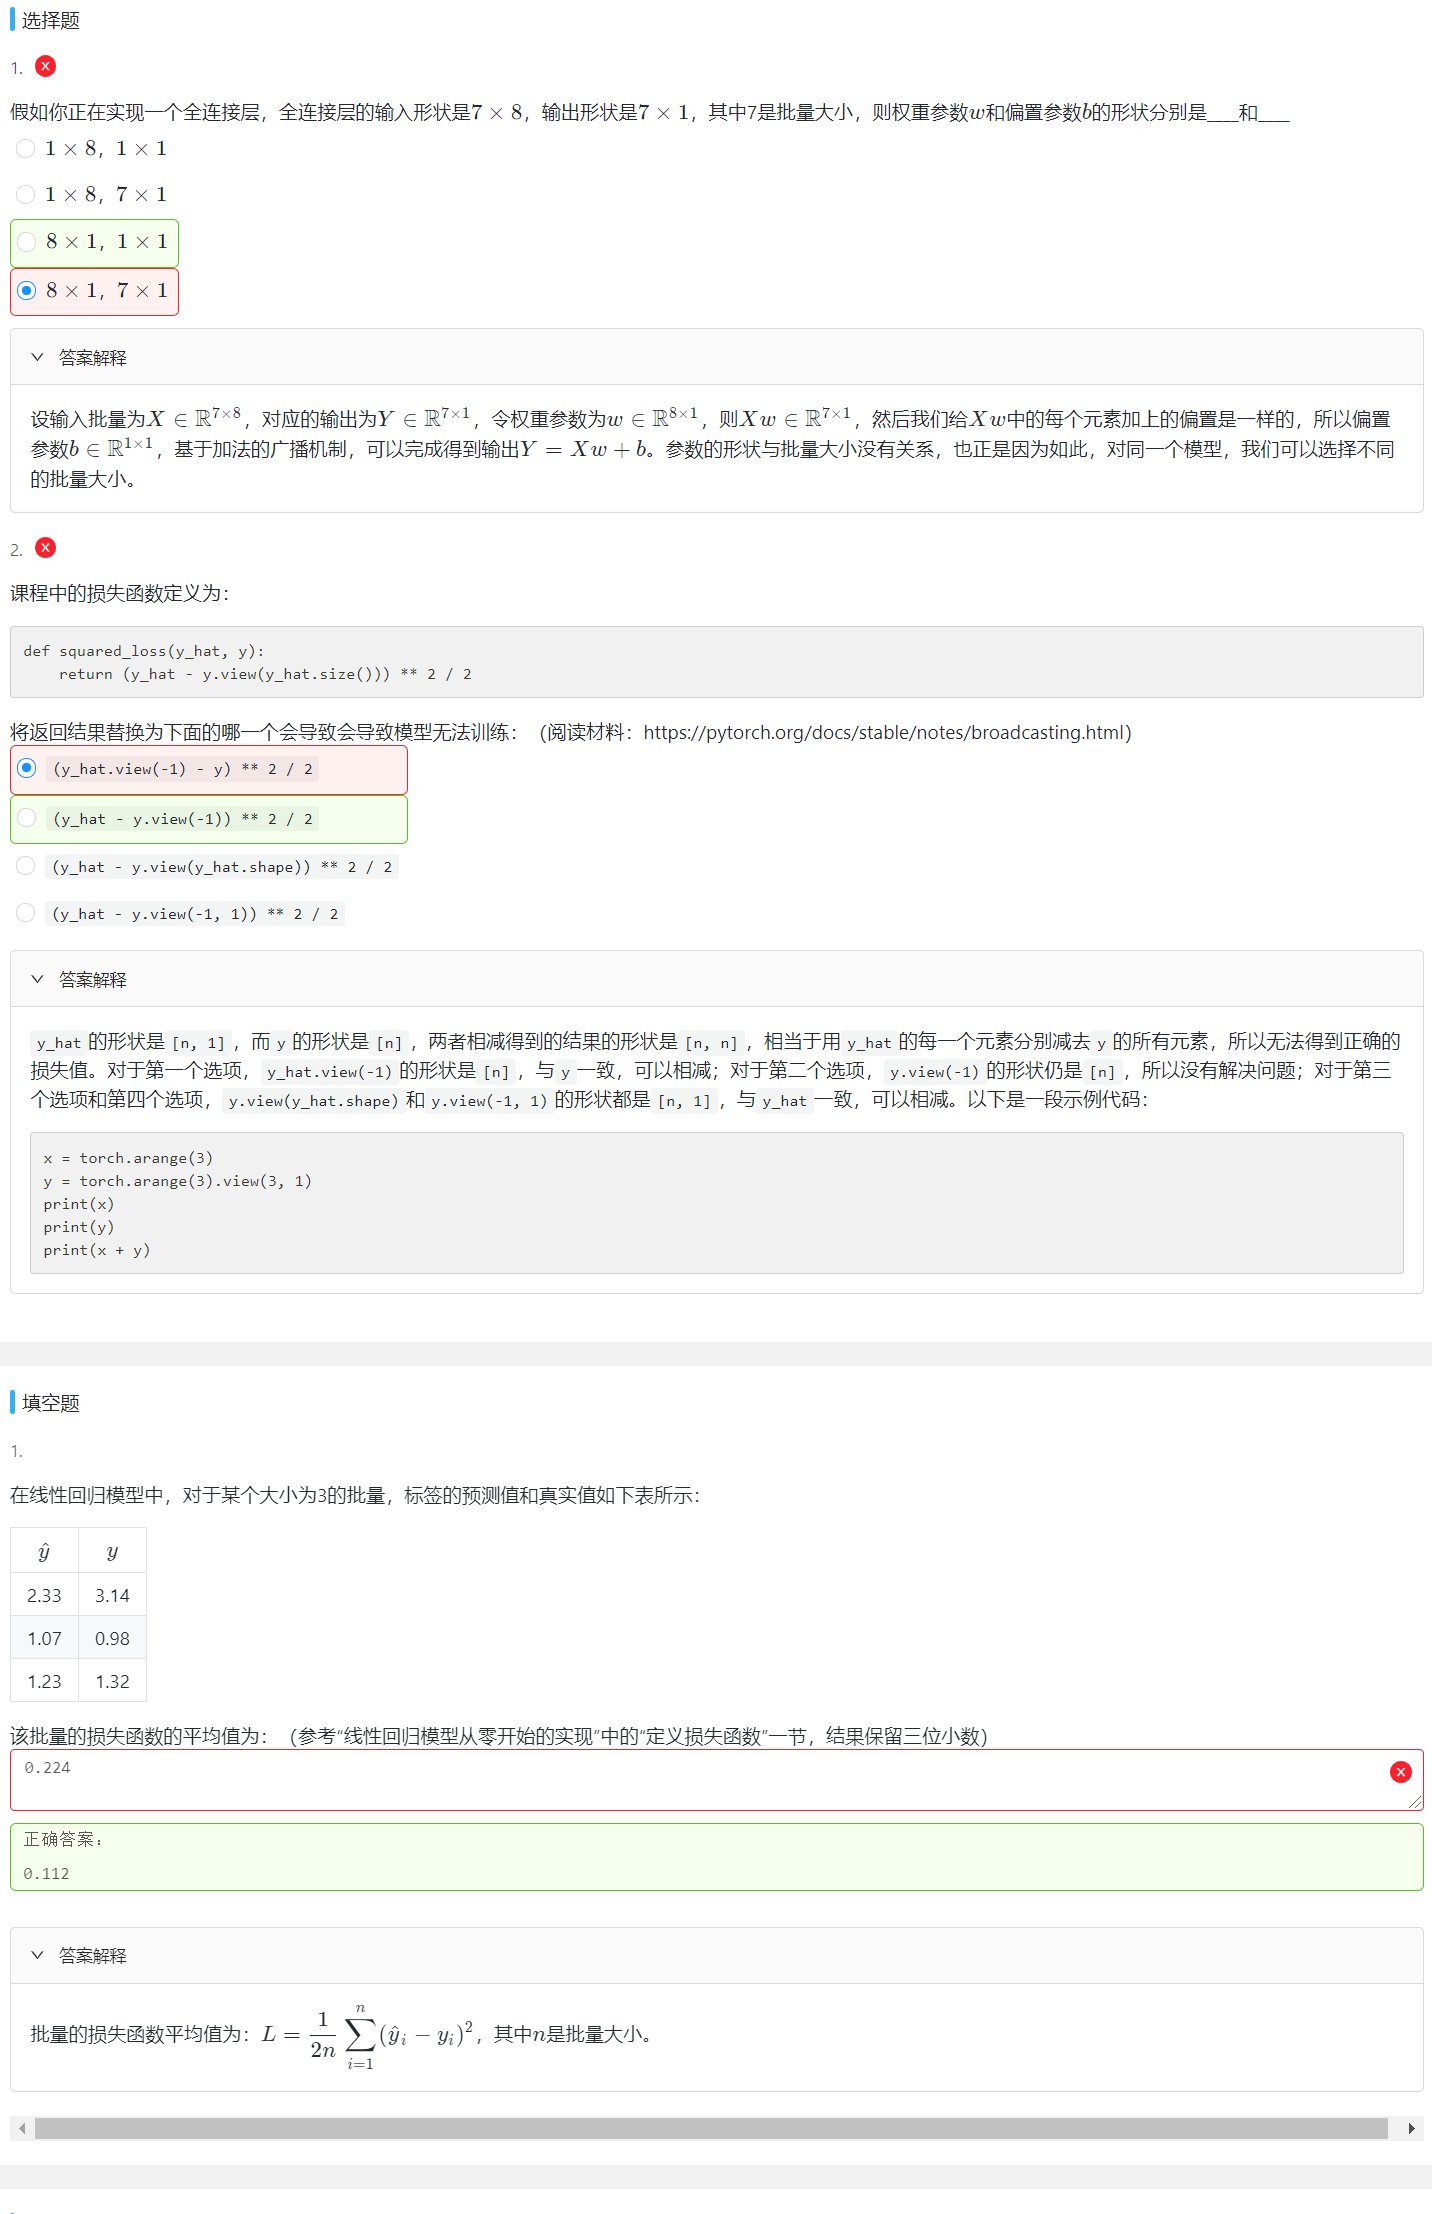